In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt1
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, NuSVC, LinearSVC
%matplotlib inline

In [2]:
df = pd.read_csv('spam.csv',encoding = 'latin-1')

In [3]:
df.shape

(5572, 5)

In [4]:
df.info()
df=df.dropna(axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
v1            5572 non-null object
v2            5572 non-null object
Unnamed: 2    50 non-null object
Unnamed: 3    12 non-null object
Unnamed: 4    6 non-null object
dtypes: object(5)
memory usage: 217.7+ KB


In [5]:
df.columns = ['label','message']
df = df[['message','label']]

In [6]:
df['length']=df['message'].apply(len)
df.head()

,message,label,length
0,"Go until jurong point, crazy.. Available only ...",ham,111
1,Ok lar... Joking wif u oni...,ham,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,155
3,U dun say so early hor... U c already then say...,ham,49
4,"Nah I don't think he goes to usf, he lives aro...",ham,61


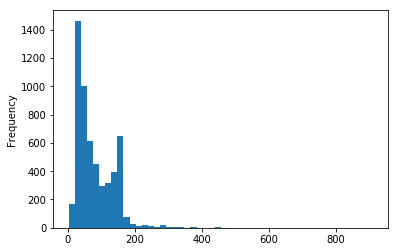

In [7]:
df['length'].plot(bins=50,kind='hist')

In [8]:
df.length.describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

In [9]:
def text_process(mess):
    nopunc =[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [10]:
#nltk.download('stopwords')
df['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [11]:
msg_train,msg_test,label_train,label_test = train_test_split(df['message'],df['label'],test_size=0.2)

#bow_transformer = CountVectorizer(analyzer=text_process).fit(df['message'])
bow_transformer = CountVectorizer(analyzer=text_process).fit(msg_train)
print(bow_transformer.vocabulary_)

{'Ok': 2611, 'problem': 7801, 'get': 5859, 'taxi': 8895, 'C': 1143, 'ing': 6322, 'tomorrow': 9095, 'tuesday': 9195, 'think': 8992, 'r': 7891, 'going': 5906, 'cinema': 4713, 'WINNER': 3584, 'valued': 9332, 'network': 7232, 'customer': 4980, 'selected': 8286, 'receivea': 7970, 'å£900': 9854, 'prize': 7795, 'reward': 8103, 'claim': 4717, 'call': 4502, '09061701461': 190, 'Claim': 1266, 'code': 4770, 'KL341': 2105, 'Valid': 3536, '12': 282, 'hours': 6180, 'URGENT': 3474, '4': 518, 'Costa': 1303, 'Del': 1402, 'Sol': 3157, 'Holiday': 1920, 'å£5000': 9842, 'await': 4145, 'collection': 4783, 'Call': 1204, '09050090044': 169, 'toClaim': 9069, 'SAE': 2933, 'TC': 3265, 'POBox334': 2678, 'Stockport': 3209, 'SK38xh': 2973, 'Costå£150pm': 1304, 'Max10mins': 2380, 'Gd': 1732, 'luck': 6823, 'ur': 9289, 'exams': 5478, 'Aight': 875, 'around': 4064, 'ltgt': 6821, 'Oh': 2608, 'dang': 5004, 'didnt': 5141, 'mean': 6946, 'send': 8298, 'Lol': 2244, 'train': 9143, 'back': 4165, 'northampton': 7292, 'im': 6272,

In [12]:
#messages_bow = bow_transformer.transform(df['message'])
messages_bow = bow_transformer.transform(msg_train)

In [13]:
tfidf_transformer = TfidfTransformer(use_idf = False)
messages_tfidf=tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(4457, 9862)


In [14]:
messages_bow1 = bow_transformer.transform(msg_test)
tfidf_transformer = TfidfTransformer(use_idf = False)
messages_tfidf1=tfidf_transformer.transform(messages_bow1)

In [16]:
model1 = LinearSVC()
model1.fit(messages_tfidf,label_train)
result1 = model2.predict(messages_tfidf1)
print(classification_report(label_test,result2))
print(confusion_matrix(label_test,result2))
accuracy_score(label_test,result2)

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       975
        spam       0.98      0.86      0.92       140

   micro avg       0.98      0.98      0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

[[972   3]
 [ 19 121]]


0.9802690582959641

In [17]:
model2 = SVC()
model2.fit(messages_tfidf,label_train)
result2 = model2.predict(messages_tfidf1)
print(classification_report(label_test,result2))
print(confusion_matrix(label_test,result2))
accuracy_score(label_test,result2)

/home/student/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

         ham       0.87      1.00      0.93       975
        spam       0.00      0.00      0.00       140

   micro avg       0.87      0.87      0.87      1115
   macro avg       0.44      0.50      0.47      1115
weighted avg       0.76      0.87      0.82      1115

[[975   0]
 [140   0]]


/home/student/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/student/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/student/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.874439461883408